In [144]:
from numpy import *
from matplotlib.pyplot import *
%matplotlib inline
poly = np.polynomial.Polynomial

from astropy.io import ascii

from scipy.integrate import quad
from scipy.interpolate import interp1d
from scipy.ndimage.filters import gaussian_filter1d
from scipy.misc import derivative

In [146]:
poly.polyfit?

Object `poly.polyfit` not found.


In [2]:
#ascii.read("TMHEasyMiniData.txt", data_start = 14)
#ascii.read("TMHStratoData.txt", data_start = 15)

In [3]:
easymini = ascii.read("TMHEasyMiniData.txt", data_start = 14)
stratologger = ascii.read("TMHStratoData.txt", data_start = 15)

In [4]:
emAlt = easymini["altitude"]
emPress = easymini["pressure"]
emAccel = easymini["acceleration"]
emTime = easymini["time"]

slAlt = stratologger["col2"]
slVel = stratologger["col3"]
slTime = stratologger["col1"]

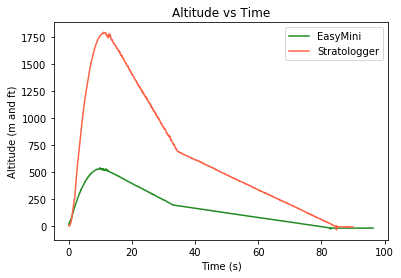

In [5]:
plot(emTime, emAlt, c = "forestgreen", label = "EasyMini")
plot(slTime, slAlt, c = "tomato", label = "Stratologger")
legend()
title("Altitude vs Time")
xlabel("Time (s)")
ylabel("Altitude (m and ft)")
show()

In [6]:
mToFt = 3.2808
slAltM = [x/mToFt for x in slAlt]
slVel = [x/mToFt for x in slVel]

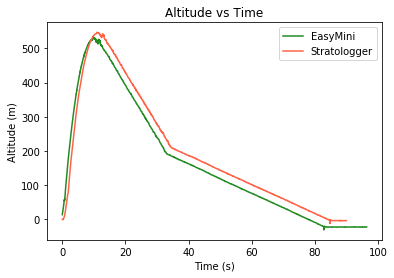

In [7]:
plot(emTime, emAlt, c = "forestgreen", label = "EasyMini")
plot(slTime, slAltM, c = "tomato", label = "Stratologger")
legend()
title("Altitude vs Time")
xlabel("Time (s)")
ylabel("Altitude (m)")
show()

In [8]:
print emAlt[500]
print slAltM[116]

timeConversion = emTime[500] - slTime[116]
print timeConversion

399.58
399.29285540112164
-0.8099999999999996


In [9]:
slTimeC = []
for i in range(0, len(slTime)):
    slTimeC.append(slTime[i] - .8099999999999996)
t_ap = slTimeC[argmax(slAlt)]
print t_ap

10.240000000000002


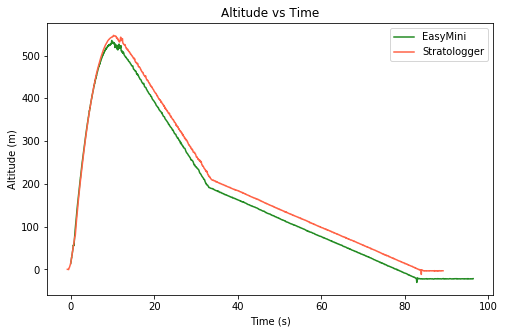

In [10]:
figure(figsize = (8, 5))
plot(emTime, emAlt, c = "forestgreen", label = "EasyMini")
plot(slTimeC, slAltM, c = "tomato", label = "Stratologger")
legend()
title("Altitude vs Time")
xlabel("Time (s)")
ylabel("Altitude (m)")
# xlim(0, .5)
# ylim(-50, 0)
show()

In [13]:
emMax =  max(emAlt)
slMax =  max(slAltM)

print emMax, slMax

# percent difference from the average
percentDiff = abs(slMax - emMax)/((slMax + emMax) / 2.) * 100
print percentDiff
print len(emTime[0:-1])
print len(emVel)

535.16 547.1226530114606
2.2106337892738845
2092
2093


In [14]:
# emVel = diff(emAlt) / (emTime[1]-emTime[0]) # divide differences between altitudes by time step for velocity
emVel = [0.0]
for i in range(1, len(emAlt)) :
    emVel.append((emAlt[i] - emAlt[i-1]) / (emTime[i] - emTime[i-1]))
smoothVel = gaussian_filter1d(emVel, 10)

time_diff = slTimeC[argmax(slVel)] - emTime[argmax(smoothVel)]
print time_diff
print slTimeC[argmax(slVel)]
print emTime[argmax(smoothVel)]
# emTime = [t + time_]



-1.5099999999999993
1.2900000000000005
2.8


c:\python27\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.


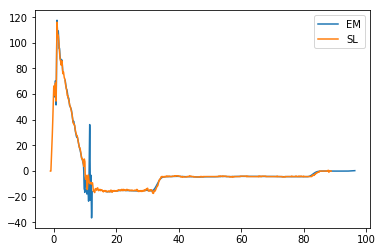

In [15]:
#plot(emTime[1:], emVel)
plot(emTime, smoothVel, label = "EM")
# plot(emTime[1:], emVel, label = "EM")
plot([x-.32 for x in slTimeC],slVel, label = "SL")# this in not long-term acceptable
legend()
# xlim(0, 3)
# ylim(-20, 0)

In [16]:
# gaussian_filter1d?

In [17]:
smoothEM = gaussian_filter1d(emAlt, 2)
smoothSL = gaussian_filter1d(slAltM, 2)

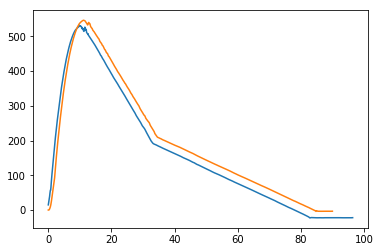

In [18]:
plot(emTime, smoothEM)
plot(slTime, smoothSL)

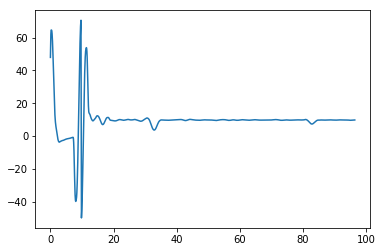

In [19]:
emAccel[970:] = emAccel[970:] * -1
plot(emTime, [x+9.8 for x in emAccel])
# xlim(2.5,3)
# ylim(-5, 0)

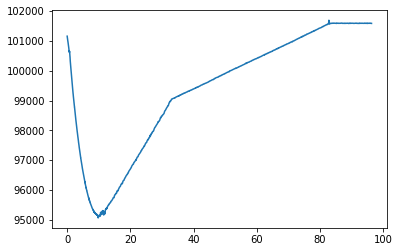

In [20]:
plot(emTime, emPress)

In [21]:
max(emAlt)

535.16

In [22]:
emAlt[970]

535.16

In [23]:
emTime[970]

9.82

In [24]:
print emTime

 time
-----
  0.0
 0.01
 0.02
 0.03
 0.04
 0.05
 0.06
 0.07
 0.08
 0.09
  ...
95.36
95.46
95.56
95.66
95.76
95.86
95.96
96.06
96.16
96.26
96.36
Length = 2093 rows


In [25]:
print range(2)

[0, 1]


In [26]:
# argmax?

In [27]:
# Fd = ma = .5 * cd * v^2 * r

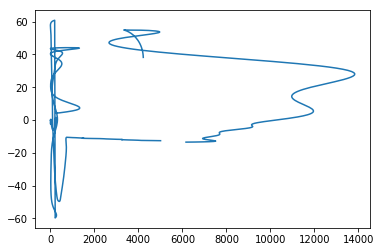

In [28]:
plot([x**2 for x in smoothVel], emAccel)

In [29]:
T = 283 # [K]
R = 287 # [J/(kg*K)]
rho = [x / (T*R) for x in emPress]  # [kg/m^2]
#print rho

In [65]:
inToM = 0.0254
A = (1.55**2 * pi + 1.24*4) * inToM**2   #[m^2]
m = 5.127    # [kg] dry mass
C = 2 * m / A   # [kg/m^2]
cdEm = []
for i in range(len(emPress)) :
    v = smoothVel[i]
    a = emAccel[i]
    #stupid time issue, will work on later
    cdEm.append(C * a / (v**2 * rho[i]))
#print cdEm

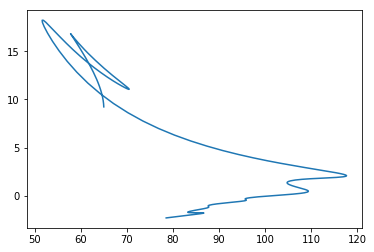

In [66]:
plot(smoothVel[0:281], cdEm[0:281])
#xlim(0,)
#ylim(-20,20)

In [67]:
for i in range(0, len(smoothVel)):
    #plot(i, smoothVel[i], ".")
    #plot(i, emAlt[i], ".")
    #plot(i, cdEm[i], ".")
    #print(i, cdEm[i])
    
#there are a bunch of nans around value 280, and 1200 that may be messing up the data plot
#although, all the other numbers dont make sense which is odd

IndentationError: expected an indented block (<ipython-input-67-8af01bde9980>, line 8)

In [58]:
slAccel = []
for i in range(0, len(slVel)):
    slAccel.append((slVel[i] - slVel[i-1]) / (slTime[i] - slTime[i-1]))

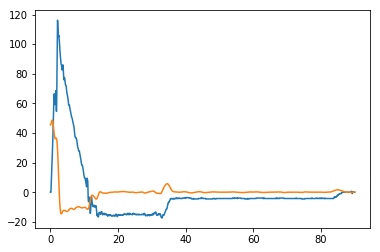

In [64]:
#plot(slTime, slAccel)
plot(slTime, slVel)
slAccelSmooth = gaussian_filter1d(slAccel, 10)
plot(slTime, slAccelSmooth)

In [68]:
cdSl = []
for i in range(len(slVel)) :
    v = slVel[i]
    a = slAccel[i]
    cdSl.append(C * a / (v**2 * rho[i]))
#print cdSl

[nan, nan, nan, nan, 6088.682849933102, 1519.2632126196404, 671.8953531238973, 362.69031387058345, 226.57353460720543, 119.61444001438569, 67.81174861002711, 66.47420091684201, 63.342725777837046, 64.41426746727358, 65.88817121280036, 56.39193461817459, 48.48948256590072, 41.89988971268143, 32.83453177944367, 26.276752166250986, 21.363498241411193, 14.919402604477087, 7.120319698003961, 1.411154856892409, -7.391065671455484, -12.768593055993422, -11.978476131308541, -7.1296618657902435, 3.492658046389671, 12.896892385930398, 15.966348700168963, 12.035921513769324, 1.325555638414397, -16.11942901168122, -29.396862741121865, -32.77600037670441, -4.189479760381001, 32.53008584754695, 47.40545647682165, 40.46718356405386, 28.548544140700123, 16.272750330069776, 5.551257003715892, -1.8898747557850162, -6.049629418886061, -5.895717218331853, -4.488410612280893, -1.1354923590221773, 1.1224923068374921, 1.1096491905463561, -0.5580879484919636, -1.7038301520941623, -3.5302066134029477, -4.93841

c:\python27\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """
c:\python27\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
  """


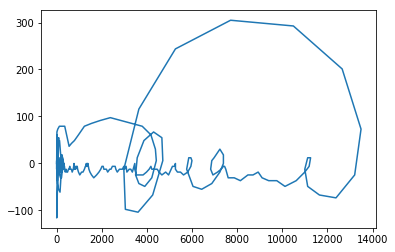

In [74]:
plot([x**2 for x in slVel], slAccel)

#oooo pretty

# In the following cells Im trying to get a best fit line for the vel vs cd plot

Im just googling it and I dont know what Im doing, just fyi

However, this plot does look promising if you look at the final plot. With a best fit, I feel like we could get a rough determination of the cd of TMH at higher velocites (cd is irregular and not clear at lower velocites). Also, notice how the plot for v**(2) vs accel is very similar to the plot for vel vs cd, interesting right?

[ 65.53373515  65.20513568 189.95480468         -inf          inf]
[39.31967813 39.35055341 39.3814287  39.41230399 39.44317928 39.47405456
 39.50492985 39.53580514 39.56668042 39.59755571 39.628431   39.65930629
 39.69018157 39.72105686 39.75193215 39.78280743 39.81368272 39.84455801
 39.8754333  39.90630858 39.93718387 39.96805916 39.99893444 40.02980973
 40.06068502 40.0915603  40.12243559 40.15331088 40.18418617 40.21506145
 40.24593674 40.27681203 40.30768731 40.3385626  40.36943789 40.40031318
 40.43118846 40.46206375 40.49293904 40.52381432 40.55468961 40.5855649
 40.61644019 40.64731547 40.67819076 40.70906605 40.73994133 40.77081662
 40.80169191 40.8325672  40.86344248 40.89431777 40.92519306 40.95606834
 40.98694363 41.01781892 41.04869421 41.07956949 41.11044478 41.14132007
 41.17219535 41.20307064 41.23394593 41.26482121 41.2956965  41.32657179
 41.35744708 41.38832236 41.41919765 41.45007294 41.48094822 41.51182351
 41.5426988  41.57357409 41.60444937 41.63532466 41.666199

ValueError: x and y must have same first dimension, but have shapes (850,) and (5,)

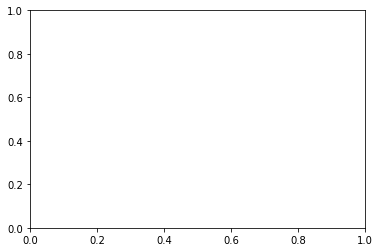

In [156]:
x_new = np.linspace(slVel[15], slVel[100], num=85*10)
coefs = polyfit(slVel[15:100], cdSl[15:100], 4)
ffit = polyval(x_new, coefs)
print ffit
print x_new
plot(x_new, ffit)

In [120]:
bestfit = polyfit(slVel[15:100], cdSl[15:100], 2)
print bestfit
deg1 = bestfit[0]
deg2 = bestfit[1]
deg3 = bestfit[2]

[ 1.61003972e-02 -2.86594192e+00  1.24623484e+02]


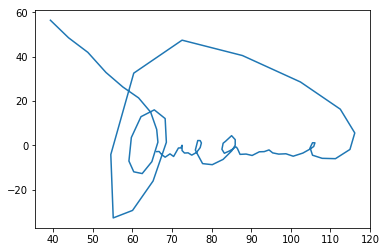

In [168]:
plot(slVel[15:100], cdSl[15:100])

(-5, 5)

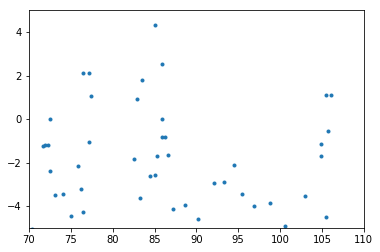

In [161]:
plot(slVel[15:100], cdSl[15:100], ".")
#plot(slVel[15:80], ([x**deg1 + x**deg2 + x**deg3 for x in slVel[15:80]]))
#plot(slVel[15:100], bf(slVel))
xlim(70, 110)
ylim(-5, 5)